In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('train.csv')

# Visualize the distribution of labels
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Analyze sentence length distribution
train_df['sentence1_len'] = train_df['premise'].apply(lambda x: len(x.split()))
train_df['sentence2_len'] = train_df['hypothesis'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(train_df['sentence1_len'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_len'], kde=True, color='red', label='Sentence 2 Length')
plt.legend()
plt.title('Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing Values in the dataset:", missing_values)

# Check for class balance
print("Class distribution:\n", train_df['label'].value_counts())


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK packages
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)

# Target variable
y = train_df['label']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


ModuleNotFoundError: No module named 'tensorflow'

In [16]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Convert labels to categorical (one-hot encoding)
num_classes = 3  # (0: Contradiction, 1: Neutral, 2: Entailment)
y_encoded = keras.utils.to_categorical(y, num_classes=num_classes)

NameError: name 'y' is not defined

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [7]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK packages
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [11]:
# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize and remove stop words
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [13]:
# Apply preprocessing to both sentences
train_df['sentence1_clean'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2_clean'] = train_df['hypothesis'].apply(preprocess_text)

# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X1 = tfidf.fit_transform(train_df['sentence1_clean']).toarray()
X2 = tfidf.transform(train_df['sentence2_clean']).toarray()

# Combine the features of both sentences into one array
import numpy as np
X = np.concatenate((X1, X2), axis=1)

# Target variable
y = train_df['label']

NameError: name 'train_df' is not defined

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'torch'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'transformers'

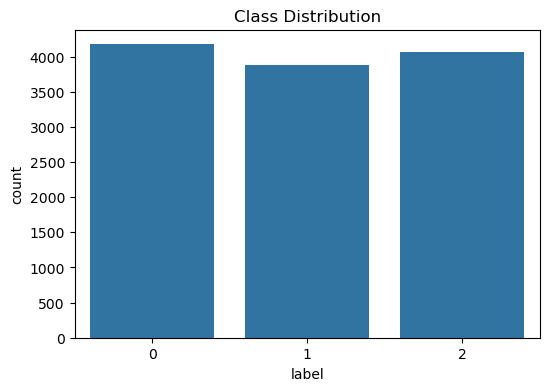

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Ayesha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.3252 - loss: 1.0999 - val_accuracy: 0.3568 - val_loss: 1.0985
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.3834 - loss: 1.0896 - val_accuracy: 0.3474 - val_loss: 1.1002
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 35s 114ms/step - accuracy: 0.5053 - loss: 0.9741 - val_accuracy: 0.2364 - val_loss: 1.3246
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.6320 - loss: 0.7387 - val_accuracy: 0.2273 - val_loss: 1.7801
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.6909 - loss: 0.6076 - val_accuracy: 0.2199 - val_loss: 2.2458
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.7170 - loss: 0.5281 - val_accuracy: 0.2294 - val_loss: 3.0246
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 114ms/step - accuracy: 0.7447 - loss: 0.4719 - val_accuracy: 0.2244 - val_loss: 3.5608
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - accuracy: 0.7463 - loss: 0

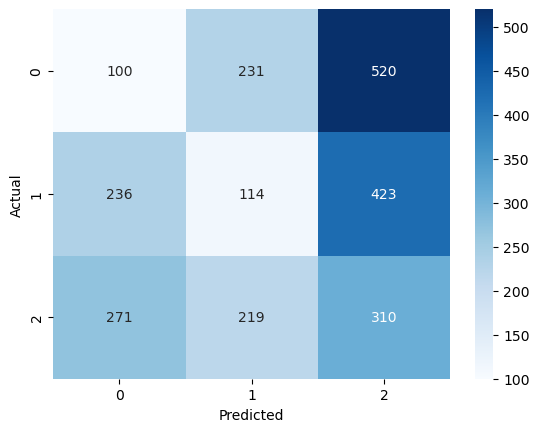

ANN Model Training and Evaluation Complete!


In [29]:
# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()






def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['sentence1'] + " " + train_df['sentence2'])
y = train_df['label']

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to dense format for TensorFlow
X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

# Build ANN Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_dense, y_train, epochs=10, batch_size=32, validation_data=(X_val_dense, y_val))

# Evaluate Model
y_pred = model.predict(X_val_dense)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes))
print("Classification Report:\n", classification_report(y_val, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("ANN Model Training and Evaluation Complete!")


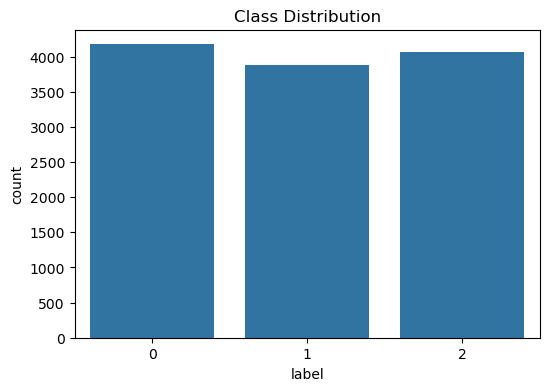

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10


C:\Users\Ayesha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3474 - loss: 188.9113 - val_accuracy: 0.3342 - val_loss: 12.6401
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3281 - loss: 20.1888 - val_accuracy: 0.3337 - val_loss: 2.7142
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3301 - loss: 5.0211 - val_accuracy: 0.3395 - val_loss: 1.2463
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3326 - loss: 2.0687 - val_accuracy: 0.3391 - val_loss: 1.1480
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3358 - loss: 1.6235 - val_accuracy: 0.3370 - val_loss: 1.1798
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3338 - loss: 1.3452 - val_accuracy: 0.3614 - val_loss: 1.1001
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3451 - loss: 1.2464 - val_accuracy: 0.3474 - val_loss: 1.1003
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3289 - loss: 1.2432 - val_accuracy: 0.3519 - 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


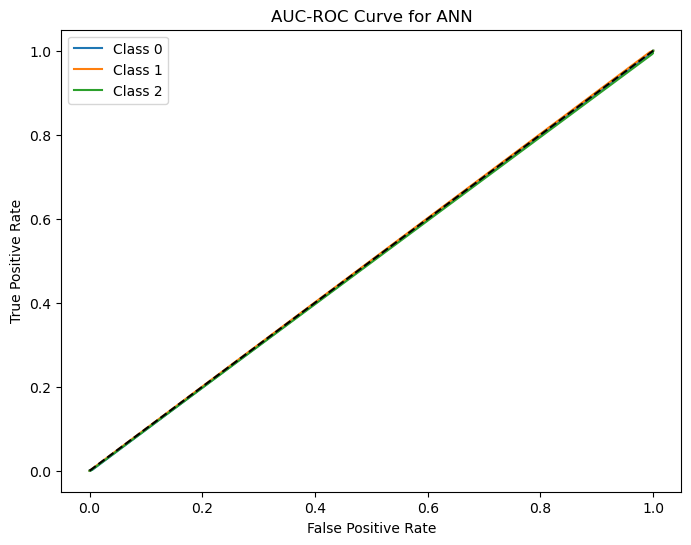

ANN Model Training and Evaluation Complete!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
train_df = pd.read_csv("train.csv")

# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['sentence1'] = train_df['premise'].apply(preprocess_text)
train_df['sentence2'] = train_df['hypothesis'].apply(preprocess_text)

# Combine sentences for input processing
train_df['combined_text'] = train_df['sentence1'] + " " + train_df['sentence2']

# Tokenization and Sequence Padding
max_words = 20000  # Maximum number of words in vocabulary
max_length = 100  # Maximum sequence length

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['combined_text'])
X = tokenizer.texts_to_sequences(train_df['combined_text'])
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
y = train_df['label'].values

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN Model
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile ANN Model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ANN Model
ann_history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate ANN Model
y_pred_ann = ann_model.predict(X_val)
y_pred_classes_ann = np.argmax(y_pred_ann, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_classes_ann))
print("Classification Report:\n", classification_report(y_val, y_pred_classes_ann))

# AUC-ROC Curve for ANN
y_pred_prob_ann = ann_model.predict(X_val)
y_val_one_hot_ann = tf.keras.utils.to_categorical(y_val, num_classes=3)

plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_val_one_hot_ann[:, i], y_pred_prob_ann[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for ANN')
plt.legend()
plt.show()

print("ANN Model Training and Evaluation Complete!")
